In [5]:
import os
import json
import pandas as pd

import matplotlib.pyplot as plt

In [6]:
experiment_results_dir = "./bird_whisperer/experiments/results/"
experiment_results_files = os.listdir(experiment_results_dir)

In [7]:
def plot_experiment_results(results, experiment_name):
  train_metrics = pd.DataFrame(results["train_metrics"])
  test_metrics = pd.DataFrame(results["test_metrics"])

  train_metrics["epoch"] = train_metrics["epoch"]
  test_metrics["epoch"] = test_metrics["epoch"] 

  metrics = ["f1-score", "precision", "recall", "accuracy", "avg_loss"]

  # Plotting metrics in pairs (two side by side)
  fig, axs = plt.subplots(len(metrics) // 2 + len(metrics) % 2, 2, figsize=(15, 12))

  # Flattening axes for convenience
  axs = axs.flatten()

  for i, metric in enumerate(metrics):
      axs[i].plot(train_metrics["epoch"], train_metrics[metric], label=f"Train {metric.capitalize()}", marker="o")
      axs[i].plot(test_metrics["epoch"], test_metrics[metric], label=f"Test {metric.capitalize()}", marker="s")
      axs[i].set_title(f"{metric.capitalize()} over Epochs")
      axs[i].set_xlabel("Epoch")
      axs[i].set_ylabel(metric.capitalize())
      axs[i].legend()
      axs[i].set_xticks(range(min(test_metrics["epoch"]), max(test_metrics["epoch"]) + 1, 2))  # Whole number ticks
      axs[i].grid(True)

      axs[i].set_ylim((0, 7 if "loss" in metric else 1))  # Y-axis starts at 0

  # Hide any unused subplots
  for j in range(len(metrics), len(axs)):
      axs[j].axis('off')

  fig.suptitle(f"{experiment_name} Results")
  fig.tight_layout()

  return fig

IsADirectoryError: [Errno 21] Is a directory: './bird_whisperer/experiments/results/.ipynb_checkpoints'

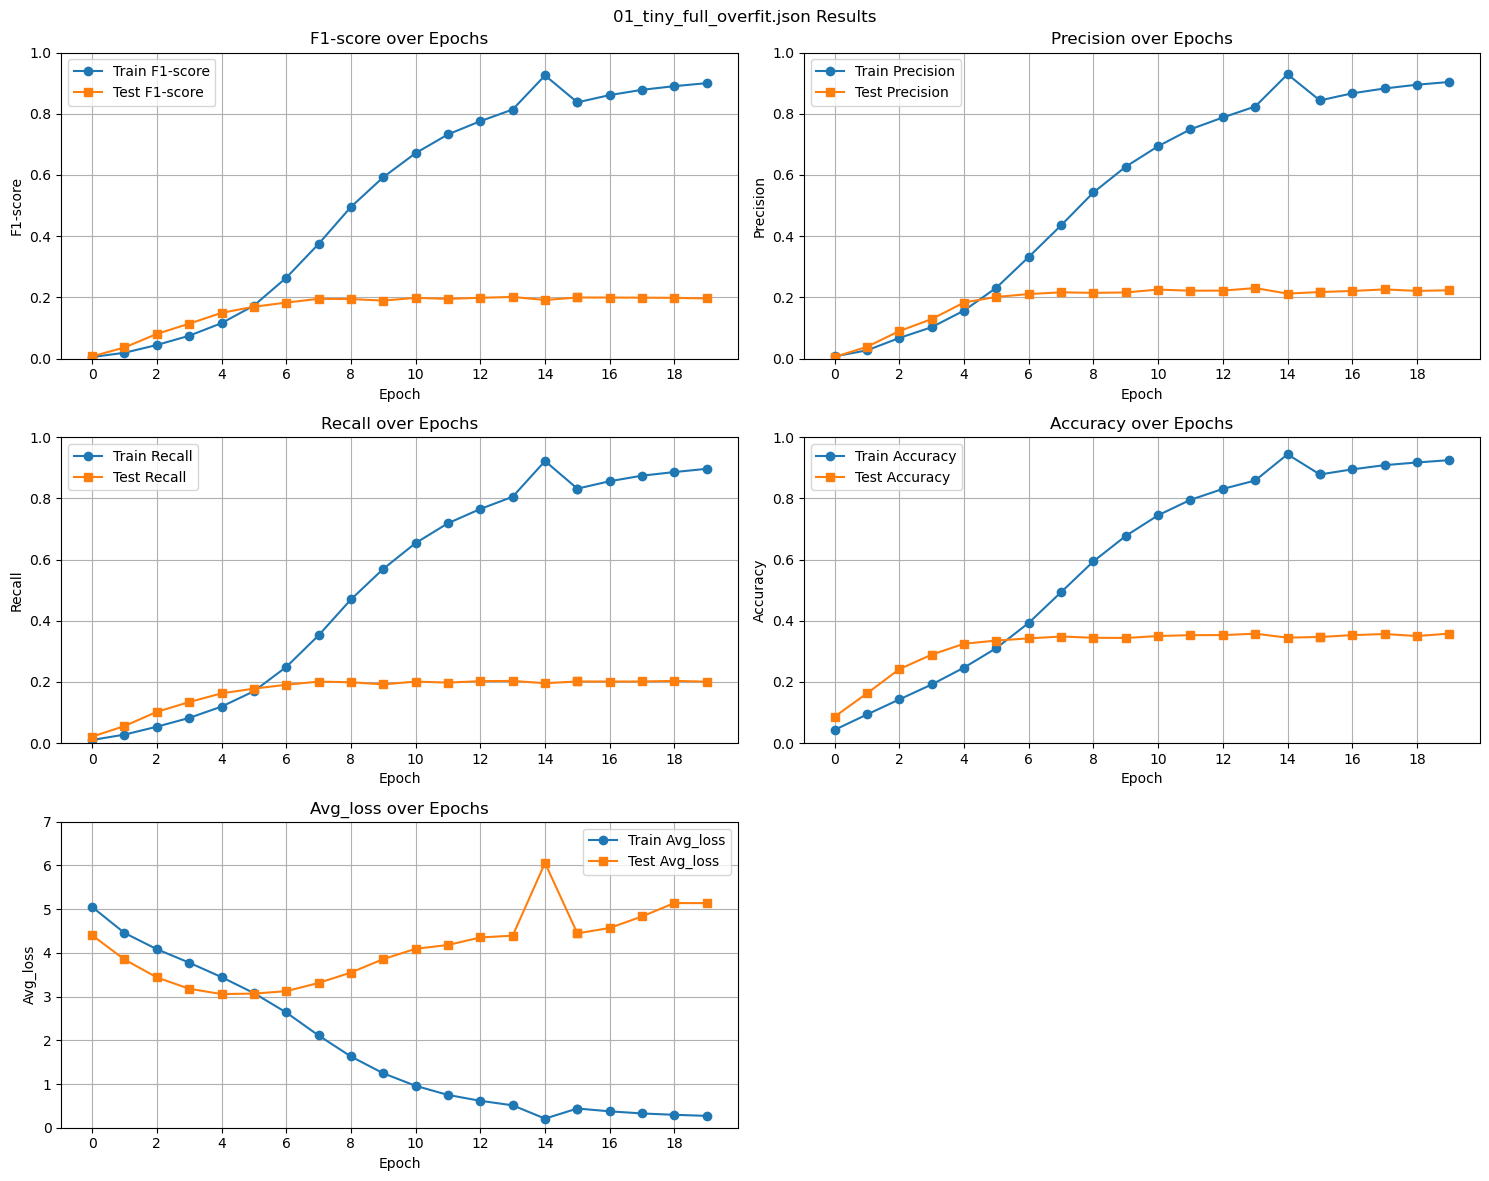

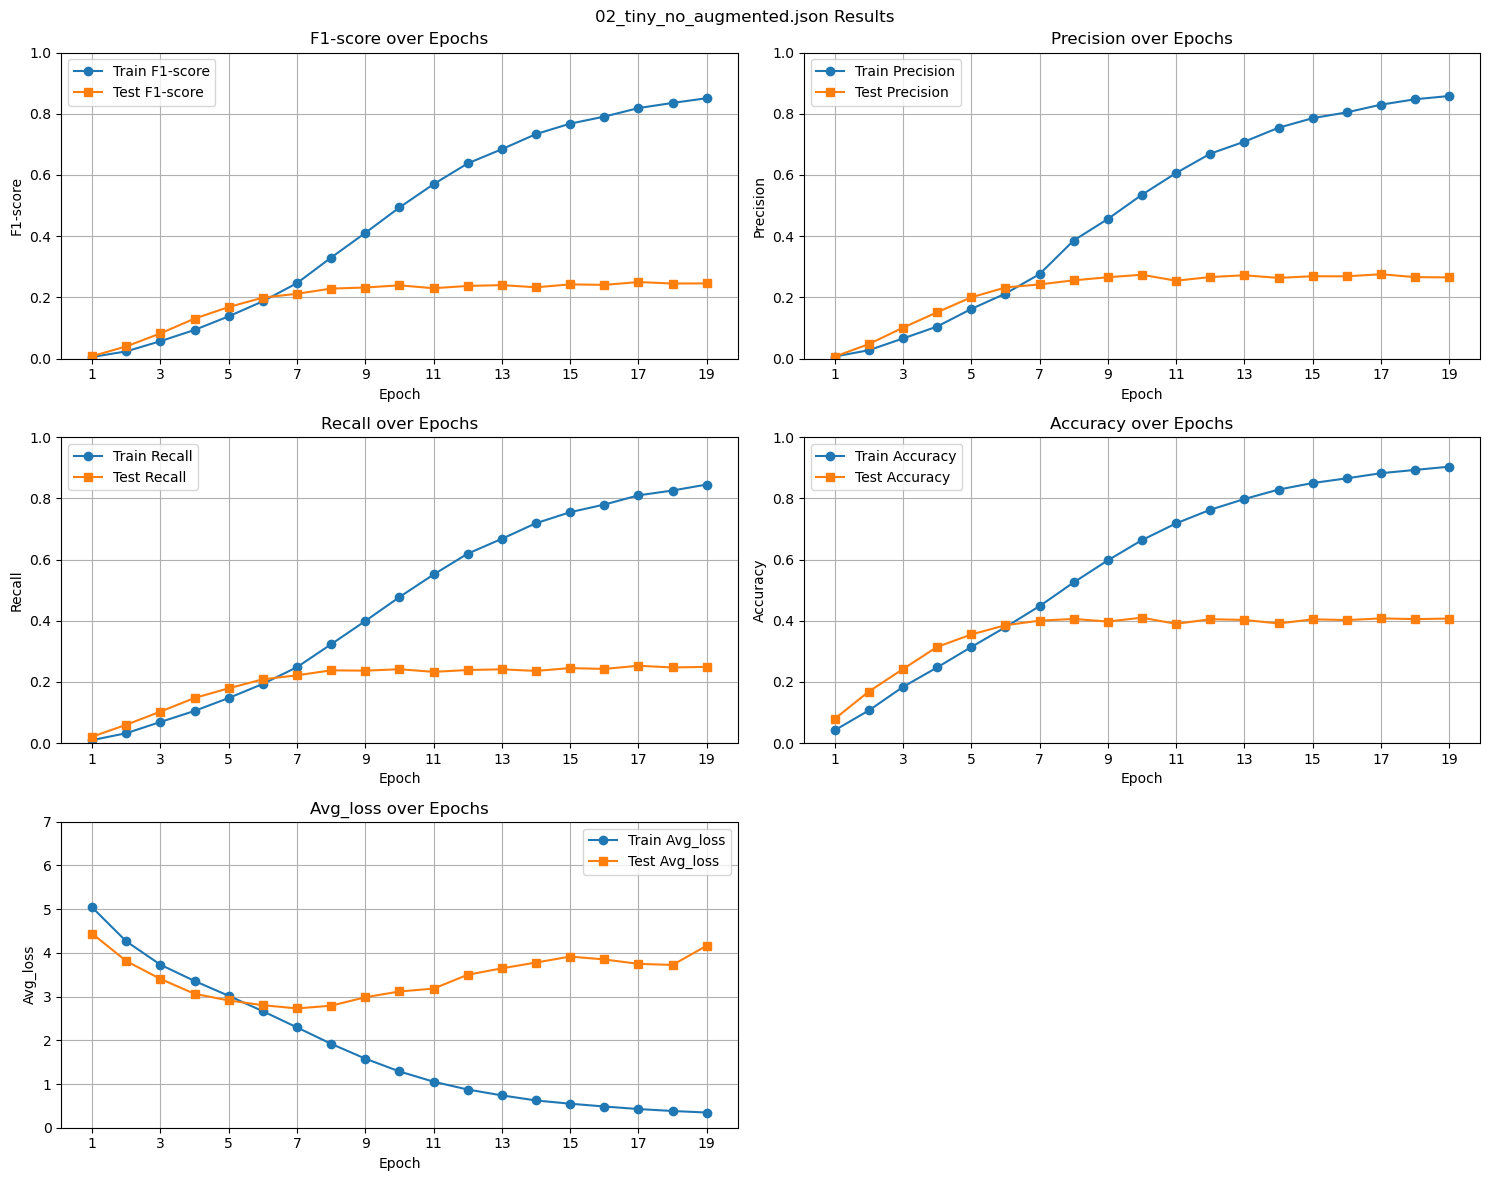

In [8]:
for experiment_results_file in experiment_results_files:
  with open(experiment_results_dir + experiment_results_file, "r") as f:
    results = json.load(f)
    plot = plot_experiment_results(results, experiment_results_file)
    plot